# ILEC 2012-2019 Life Insurance Mortality Dataset - Comprehensive Exploratory Data Analysis

## Objective
Detailed EDA on 11GB ILEC mortality data to support actuarial model interpretability.

## Dataset Overview
- **Records**: ~45.5 Million
- **Columns**: 30
- **File Size**: 12.5GB
- **Strategy**: Using chunk-based processing

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# File path
DATA_PATH = '../data/ILEC_2012_19 - 20240429.txt'
CHUNK_SIZE = 500000  # Read 500k rows per chunk

print('Environment setup complete')

環境設定完成


---
## 1. Data Overview and Structure Analysis

In [2]:
# Read first 100 sample rows and export to Excel
sample_df = pd.read_csv(DATA_PATH, sep='\t', nrows=100)
sample_df.to_excel('../data/ilec_sample_100.xlsx', index=False)
print(f'Exported first 100 rows to ilec_sample_100.xlsx')
print(f'\nColumn List ({len(sample_df.columns)} items):')
for i, col in enumerate(sample_df.columns, 1):
    print(f'{i:2}. {col}')

已匯出前 100 筆資料至 ilec_sample_100.xlsx

欄位列表 (30 個):
 1. Observation_Year
 2. Age_Ind
 3. Sex
 4. Smoker_Status
 5. Insurance_Plan
 6. Issue_Age
 7. Duration
 8. Face_Amount_Band
 9. Issue_Year
10. Attained_Age
11. SOA_Antp_Lvl_TP
12. SOA_Guar_Lvl_TP
13. SOA_Post_Lvl_Ind
14. Slct_Ult_Ind
15. Preferred_Indicator
16. Number_of_Pfd_Classes
17. Preferred_Class
18. Amount_Exposed
19. Policies_Exposed
20. Death_Claim_Amount
21. Death_Count
22. ExpDth_VBT2015_Cnt
23. ExpDth_VBT2015_Amt
24. ExpDth_VBT2015wMI_Cnt
25. ExpDth_VBT2015wMI_Amt
26. Cen2MomP1wMI_Amt
27. Cen2MomP2wMI_Amt
28. Cen3MomP1wMI_Amt
29. Cen3MomP2wMI_Amt
30. Cen3MomP3wMI_Amt


In [3]:
# Display first 10 rows
print('First 10 rows preview:')
sample_df.head(10)

前 10 筆資料預覽:


,Observation_Year,Age_Ind,Sex,Smoker_Status,Insurance_Plan,Issue_Age,Duration,Face_Amount_Band,Issue_Year,Attained_Age,...,Death_Count,ExpDth_VBT2015_Cnt,ExpDth_VBT2015_Amt,ExpDth_VBT2015wMI_Cnt,ExpDth_VBT2015wMI_Amt,Cen2MomP1wMI_Amt,Cen2MomP2wMI_Amt,Cen3MomP1wMI_Amt,Cen3MomP2wMI_Amt,Cen3MomP3wMI_Amt
0,2012,ALB,M,NS,Term,34,17,"05: 100,000 - 249,999",1996,50,...,0,0.023350,3148.662354,0.023803,3209.731689,4.739569e+08,7.392187e+05,7.608497e+13,1.186678e+11,1.850832e+08
1,2012,ALB,M,NS,Term,34,17,"05: 100,000 - 249,999",1996,50,...,0,0.000054,8.173872,0.000056,8.332407,1.249861e+06,1.949377e+03,1.874791e+11,2.924065e+08,4.560591e+05
2,2012,ALB,M,NS,Term,34,17,"06: 250,000 - 499,999",1995,50,...,0,0.045968,12781.933594,0.046859,13029.843750,3.722661e+09,5.806140e+06,1.100195e+15,1.715947e+12,2.676319e+09
3,2012,ALB,M,NS,Term,34,17,"06: 250,000 - 499,999",1995,50,...,0,0.006266,1576.443726,0.006388,1607.019287,4.043696e+08,6.306851e+05,1.017723e+14,1.587316e+11,2.475697e+08
4,2012,ALB,M,NS,Term,34,17,"06: 250,000 - 499,999",1995,50,...,0,0.002425,606.147339,0.002472,617.903748,1.544760e+08,2.409322e+05,3.861899e+13,6.023306e+10,9.394398e+07
5,2012,ALB,M,NS,Term,34,17,"06: 250,000 - 499,999",1995,50,...,0,0.007416,2136.582764,0.007560,2178.022461,6.520857e+08,1.017042e+06,2.033814e+14,3.172089e+11,4.947428e+08
6,2012,ALB,M,NS,Term,34,17,"06: 250,000 - 499,999",1995,50,...,0,0.001020,255.000122,0.001040,259.945923,6.498648e+07,1.013578e+05,1.624662e+13,2.533945e+10,3.952130e+07
7,2012,ALB,M,NS,Term,34,17,"06: 250,000 - 499,999",1995,50,...,0,0.005175,1359.476196,0.005276,1385.843628,3.661595e+08,5.710897e+05,9.734681e+13,1.518294e+11,2.368044e+08
8,2012,ALB,M,NS,Term,34,17,"06: 250,000 - 499,999",1996,50,...,0,0.001572,486.036865,0.001602,495.463684,1.570678e+08,2.449746e+05,5.088758e+13,7.936808e+10,1.237884e+08
9,2012,ALB,M,NS,Term,34,17,"06: 250,000 - 499,999",1996,50,...,0,0.001086,271.417786,0.001107,276.682037,6.917050e+07,1.078835e+05,1.729263e+13,2.697087e+10,4.206579e+07


In [4]:
# Data types and basic info
print('Data Types:')
print(sample_df.dtypes)
print(f'\nMemory Usage (100 rows): {sample_df.memory_usage(deep=True).sum() / 1024:.2f} KB')

資料型態:
Observation_Year           int64
Age_Ind                   object
Sex                       object
Smoker_Status             object
Insurance_Plan            object
Issue_Age                  int64
Duration                   int64
Face_Amount_Band          object
Issue_Year                 int64
Attained_Age               int64
SOA_Antp_Lvl_TP           object
SOA_Guar_Lvl_TP           object
SOA_Post_Lvl_Ind          object
Slct_Ult_Ind              object
Preferred_Indicator        int64
Number_of_Pfd_Classes    float64
Preferred_Class          float64
Amount_Exposed           float64
Policies_Exposed         float64
Death_Claim_Amount         int64
Death_Count                int64
ExpDth_VBT2015_Cnt       float64
ExpDth_VBT2015_Amt       float64
ExpDth_VBT2015wMI_Cnt    float64
ExpDth_VBT2015wMI_Amt    float64
Cen2MomP1wMI_Amt         float64
Cen2MomP2wMI_Amt         float64
Cen3MomP1wMI_Amt         float64
Cen3MomP2wMI_Amt         float64
Cen3MomP3wMI_Amt         float64
dtyp

---
## 2. Chunk-Based Full Data Statistics Calculation

In [5]:
# Define column categories
CATEGORICAL_COLS = ['Observation_Year', 'Age_Ind', 'Sex', 'Smoker_Status', 'Insurance_Plan',
                    'Face_Amount_Band', 'SOA_Antp_Lvl_TP', 'SOA_Guar_Lvl_TP', 'SOA_Post_Lvl_Ind',
                    'Slct_Ult_Ind', 'Preferred_Indicator', 'Number_of_Pfd_Classes', 'Preferred_Class']

NUMERICAL_COLS = ['Issue_Age', 'Duration', 'Issue_Year', 'Attained_Age',
                  'Amount_Exposed', 'Policies_Exposed', 'Death_Claim_Amount', 'Death_Count',
                  'ExpDth_VBT2015_Cnt', 'ExpDth_VBT2015_Amt', 'ExpDth_VBT2015wMI_Cnt', 'ExpDth_VBT2015wMI_Amt']

In [6]:
# Chunk-based statistics calculation
print('Starting Chunk-based processing...')

# Initialize statistical variables
total_rows = 0
missing_counts = defaultdict(int)
cat_value_counts = {col: defaultdict(int) for col in CATEGORICAL_COLS}
num_sums = defaultdict(float)
num_sum_sq = defaultdict(float)
num_mins = defaultdict(lambda: float('inf'))
num_maxs = defaultdict(lambda: float('-inf'))
num_counts = defaultdict(int)

# Key metrics summary
total_death_count = 0
total_policies_exposed = 0
total_amount_exposed = 0
total_death_claim_amount = 0
total_exp_death_cnt = 0
total_exp_death_amt = 0

# Process each chunk
chunk_num = 0
for chunk in pd.read_csv(DATA_PATH, sep='\t', chunksize=CHUNK_SIZE):
    chunk_num += 1
    total_rows += len(chunk)
    
    # Missing value statistics
    for col in chunk.columns:
        missing_counts[col] += chunk[col].isna().sum()
    
    # Categorical variable statistics
    for col in CATEGORICAL_COLS:
        if col in chunk.columns:
            for val, cnt in chunk[col].value_counts().items():
                cat_value_counts[col][val] += cnt
    
    # Numerical variable statistics
    for col in NUMERICAL_COLS:
        if col in chunk.columns:
            valid_data = chunk[col].dropna()
            if len(valid_data) > 0:
                num_sums[col] += valid_data.sum()
                num_sum_sq[col] += (valid_data ** 2).sum()
                num_mins[col] = min(num_mins[col], valid_data.min())
                num_maxs[col] = max(num_maxs[col], valid_data.max())
                num_counts[col] += len(valid_data)
    
    # Key metrics summary
    total_death_count += chunk['Death_Count'].sum()
    total_policies_exposed += chunk['Policies_Exposed'].sum()
    total_amount_exposed += chunk['Amount_Exposed'].sum()
    total_death_claim_amount += chunk['Death_Claim_Amount'].sum()
    total_exp_death_cnt += chunk['ExpDth_VBT2015_Cnt'].sum()
    total_exp_death_amt += chunk['ExpDth_VBT2015_Amt'].sum()
    
    if chunk_num % 10 == 0:
        print(f'  Processed {chunk_num} chunks ({total_rows:,} records)')

print(f'\n處理完成! 總計 {total_rows:,} recordsData')

開始 Chunk-based 處理...
  已處理 10 chunks (5,000,000 筆)
  已處理 20 chunks (10,000,000 筆)
  已處理 30 chunks (15,000,000 筆)
  已處理 40 chunks (20,000,000 筆)
  已處理 50 chunks (25,000,000 筆)
  已處理 60 chunks (30,000,000 筆)
  已處理 70 chunks (35,000,000 筆)
  已處理 80 chunks (40,000,000 筆)
  已處理 90 chunks (45,000,000 筆)

處理完成! 總計 45,501,036 筆資料


---
## 3. Missing Value Analysis

In [7]:
# Missing value statisticsTable
missing_df = pd.DataFrame({
    'Column': list(missing_counts.keys()),
    'Missing Count': list(missing_counts.values()),
    'Missing Rate(%)': [v / total_rows * 100 for v in missing_counts.values()]
}).sort_values('Missing Rate(%)', ascending=False)

print('Missing Value Analysis:')
missing_df

缺失值分析:


,欄位,缺失數,缺失率(%)
12,SOA_Post_Lvl_Ind,24571844,54.002823
15,Number_of_Pfd_Classes,14615884,32.122091
16,Preferred_Class,14615884,32.122091
28,Cen3MomP2wMI_Amt,0,0.000000
27,Cen3MomP1wMI_Amt,0,0.000000
26,Cen2MomP2wMI_Amt,0,0.000000
25,Cen2MomP1wMI_Amt,0,0.000000
24,ExpDth_VBT2015wMI_Amt,0,0.000000
23,ExpDth_VBT2015wMI_Cnt,0,0.000000
22,ExpDth_VBT2015_Amt,0,0.000000


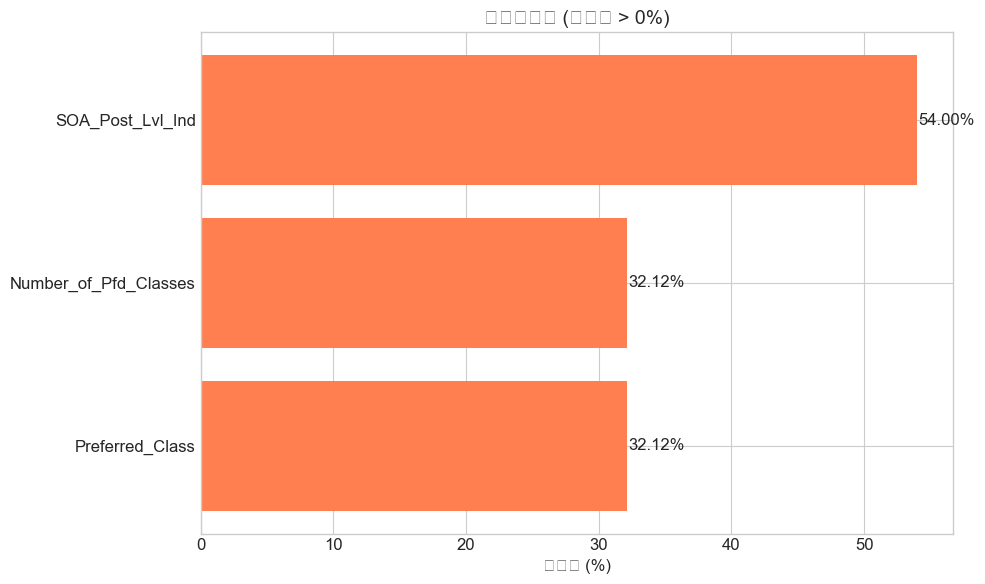

In [8]:
# Missing value visualization
missing_plot = missing_df[missing_df['Missing Rate(%)'] > 0].head(15)
if len(missing_plot) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(missing_plot['Column'], missing_plot['Missing Rate(%)'], color='coral')
    ax.set_xlabel('Missing Rate (%)')
    ax.set_title('Missing Value Distribution (Missing Rate > 0%)')
    ax.invert_yaxis()
    for bar, val in zip(bars, missing_plot['Missing Rate(%)']):
        ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{val:.2f}%', va='center')
    plt.tight_layout()
    plt.show()
else:
    print('No missing values in any columns!')

---
## 4. Numerical Variable Statistics Summary

In [9]:
# Calculate numerical variable statistics
num_stats = []
for col in NUMERICAL_COLS:
    if num_counts[col] > 0:
        mean = num_sums[col] / num_counts[col]
        variance = (num_sum_sq[col] / num_counts[col]) - (mean ** 2)
        std = np.sqrt(max(0, variance))
        num_stats.append({
            'Column': col,
            'Count': num_counts[col],
            'Mean': mean,
            'Std': std,
            'Min': num_mins[col],
            'Max': num_maxs[col]
        })

num_stats_df = pd.DataFrame(num_stats)
print('Numerical Variable Statistics Summary:')
num_stats_df

數值變數統計摘要:


,欄位,筆數,平均值,標準差,最小值,最大值
0,Issue_Age,45501036,4.026115e+01,1.674750e+01,0.0,1.000000e+02
1,Duration,45501036,1.368296e+01,1.044001e+01,1.0,1.190000e+02
2,Issue_Year,45501036,2.002839e+03,1.045832e+01,1901.0,2.019000e+03
3,Attained_Age,45501036,5.294412e+01,1.764405e+01,0.0,1.200000e+02
4,Amount_Exposed,45501036,2.320236e+06,9.924166e+06,0.0,9.288816e+08
5,Policies_Exposed,45501036,1.020885e+01,5.005856e+01,0.0,1.395652e+04
6,Death_Claim_Amount,45501036,6.372527e+03,1.213110e+05,0.0,7.500000e+07
7,Death_Count,45501036,1.000419e-01,1.371583e+00,0.0,2.430000e+02
8,ExpDth_VBT2015_Cnt,45501036,9.322030e-02,1.332793e+00,0.0,2.326158e+02
9,ExpDth_VBT2015_Amt,45501036,6.999280e+03,4.154032e+04,0.0,1.045331e+07


---
## 5. Categorical Variable Distribution Analysis

In [10]:
# Categorical Variable Distribution Table
for col in ['Sex', 'Smoker_Status', 'Preferred_Indicator', 'Slct_Ult_Ind']:
    if col in cat_value_counts:
        counts = dict(cat_value_counts[col])
        df = pd.DataFrame({
            'Category': list(counts.keys()),
            'Count': list(counts.values())
        })
        df['Proportion(%)'] = df['Count'] / df['Count'].sum() * 100
        df = df.sort_values('Count', ascending=False)
        print(f'\n=== {col} Distribution ===')
        display(df)


=== Sex 分布 ===


,類別,筆數,比例(%)
0,M,24333152,53.478237
1,F,21167884,46.521763



=== Smoker_Status 分布 ===


,類別,筆數,比例(%)
0,NS,32872436,72.245467
1,S,8695643,19.110868
2,U,3932957,8.643665



=== Preferred_Indicator 分布 ===


,類別,筆數,比例(%)
0,1,19415143,42.669672
3,1,10671548,23.453418
1,0,9617625,21.137156
2,0,4998259,10.984934
4,U,798461,1.754819



=== Slct_Ult_Ind 分布 ===


,類別,筆數,比例(%)
0,S,36564190,80.359027
1,U,8936846,19.640973


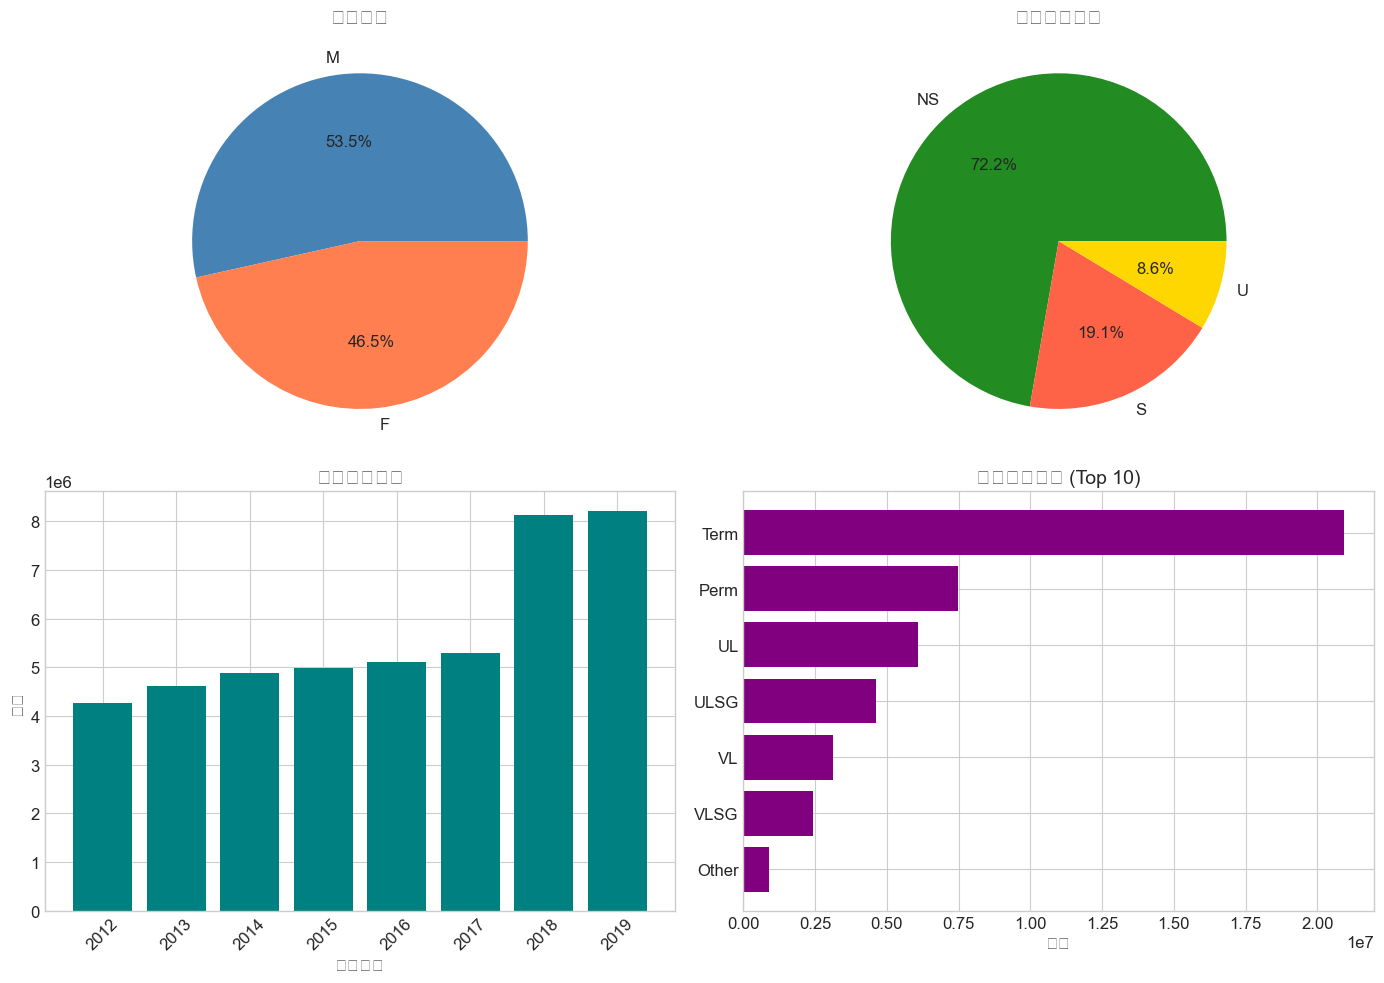

In [11]:
# Key Categorical Variable Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sex Distribution
sex_counts = dict(cat_value_counts['Sex'])
axes[0, 0].pie(sex_counts.values(), labels=sex_counts.keys(), autopct='%1.1f%%', 
               colors=['steelblue', 'coral', 'gray'])
axes[0, 0].set_title('SexDistribution')

# Smoker_Status Distribution
smoker_counts = dict(cat_value_counts['Smoker_Status'])
axes[0, 1].pie(smoker_counts.values(), labels=smoker_counts.keys(), autopct='%1.1f%%',
               colors=['forestgreen', 'tomato', 'gold'])
axes[0, 1].set_title('Smoker StatusDistribution')

# Observation_Year Distribution
year_counts = dict(sorted(cat_value_counts['Observation_Year'].items()))
axes[1, 0].bar(year_counts.keys(), year_counts.values(), color='teal')
axes[1, 0].set_xlabel('Observation Years')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Observation YearsDistribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Insurance_Plan Distribution (Top 10)
plan_counts = dict(cat_value_counts['Insurance_Plan'])
top_plans = dict(sorted(plan_counts.items(), key=lambda x: x[1], reverse=True)[:10])
axes[1, 1].barh(list(top_plans.keys()), list(top_plans.values()), color='purple')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Insurance Plan Distribution (Top 10)')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

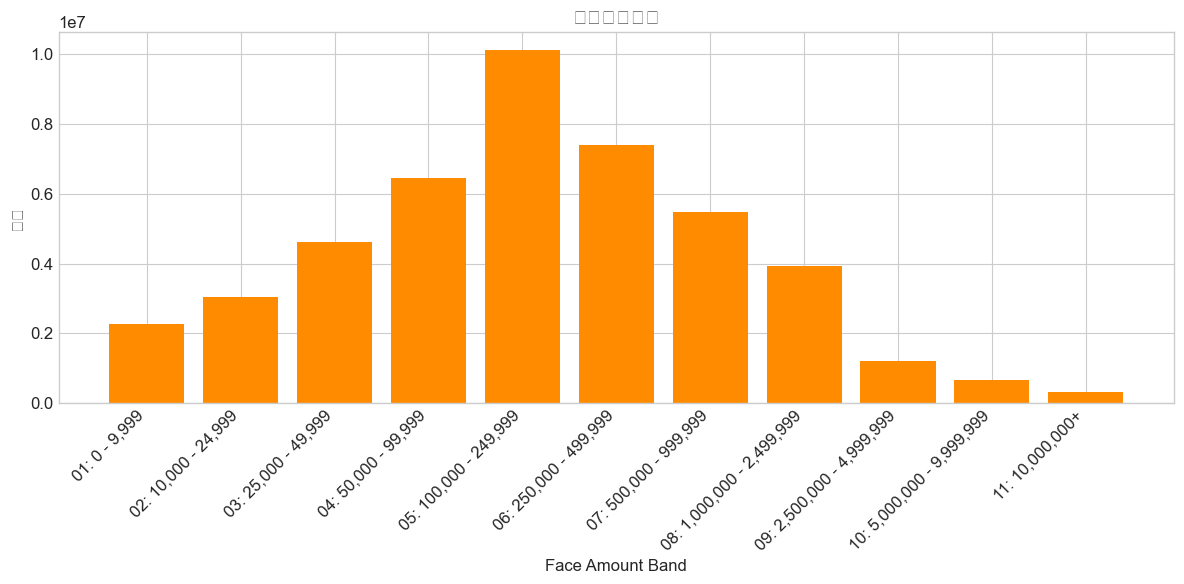

In [12]:
# Face_Amount_Band Distribution
face_band_counts = dict(cat_value_counts['Face_Amount_Band'])
face_band_df = pd.DataFrame({
    'Face Amount Band': list(face_band_counts.keys()),
    'Count': list(face_band_counts.values())
}).sort_values('Face Amount Band')

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(len(face_band_df)), face_band_df['Count'], color='darkorange')
ax.set_xticks(range(len(face_band_df)))
ax.set_xticklabels(face_band_df['Face Amount Band'], rotation=45, ha='right')
ax.set_xlabel('Face Amount Band')
ax.set_ylabel('Count')
ax.set_title('Face Amount Band Distribution')
plt.tight_layout()
plt.show()

---
## 6. Key Actuarial Metrics Summary

In [13]:
# Calculate A/E Ratio
ae_ratio_count = total_death_count / total_exp_death_cnt if total_exp_death_cnt > 0 else 0
ae_ratio_amount = total_death_claim_amount / total_exp_death_amt if total_exp_death_amt > 0 else 0

print('=' * 60)
print('             Key Actuarial Metrics Summary')
print('=' * 60)
print(f'Total Records:        {total_rows:>20,}')
print(f'Total Policies Exposed:        {total_policies_exposed:>20,.2f}')
print(f'Total Amount Exposed:        ${total_amount_exposed:>19,.0f}')
print('-' * 60)
print(f'Actual Death Count:      {total_death_count:>20,.2f}')
print(f'Actual Death Claim Amount:      ${total_death_claim_amount:>19,.0f}')
print('-' * 60)
print(f'Expected Death Count (VBT2015): {total_exp_death_cnt:>15,.2f}')
print(f'Expected Death Amount (VBT2015): ${total_exp_death_amt:>14,.0f}')
print('-' * 60)
print(f'A/E Ratio (Count):   {ae_ratio_count:>20.4f}')
print(f'A/E Ratio (Amount):   {ae_ratio_amount:>20.4f}')
print('=' * 60)

             關鍵精算指標彙總
總資料筆數:                  45,501,036
總暴險件數:              464,513,252.12
總暴險金額:        $105,573,155,815,950
------------------------------------------------------------
實際死亡件數:              4,552,009.00
實際死亡金額:      $    289,956,593,295
------------------------------------------------------------
預期死亡件數 (VBT2015):    4,241,620.45
預期死亡金額 (VBT2015): $318,474,512,689
------------------------------------------------------------
A/E 比率 (件數):                 1.0732
A/E 比率 (金額):                 0.9105


---
## 7. Mortality Analysis - By Key Factors

Using sampling strategy for group analysis

In [14]:
# Grouped Statistics - Chunk-based
print('Calculating grouped mortality statistics...')

# Group by Sex
sex_stats = defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0, 'exp_death': 0})
# Group by Smoker_Status
smoker_stats = defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0, 'exp_death': 0})
# Group by Attained_Age
age_stats = defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0, 'exp_death': 0})
# Group by Duration
dur_stats = defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0, 'exp_death': 0})
# Group by Observation_Year
year_stats = defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0, 'exp_death': 0, 'death_amount': 0, 'exp_death_amt': 0})

for chunk in pd.read_csv(DATA_PATH, sep='\t', chunksize=CHUNK_SIZE):
    # Sex
    for sex, grp in chunk.groupby('Sex'):
        sex_stats[sex]['death_count'] += grp['Death_Count'].sum()
        sex_stats[sex]['policies_exposed'] += grp['Policies_Exposed'].sum()
        sex_stats[sex]['exp_death'] += grp['ExpDth_VBT2015_Cnt'].sum()
    
    # Smoker_Status
    for smoker, grp in chunk.groupby('Smoker_Status'):
        smoker_stats[smoker]['death_count'] += grp['Death_Count'].sum()
        smoker_stats[smoker]['policies_exposed'] += grp['Policies_Exposed'].sum()
        smoker_stats[smoker]['exp_death'] += grp['ExpDth_VBT2015_Cnt'].sum()
    
    # Attained_Age
    for age, grp in chunk.groupby('Attained_Age'):
        age_stats[age]['death_count'] += grp['Death_Count'].sum()
        age_stats[age]['policies_exposed'] += grp['Policies_Exposed'].sum()
        age_stats[age]['exp_death'] += grp['ExpDth_VBT2015_Cnt'].sum()
    
    # Duration
    for dur, grp in chunk.groupby('Duration'):
        dur_stats[dur]['death_count'] += grp['Death_Count'].sum()
        dur_stats[dur]['policies_exposed'] += grp['Policies_Exposed'].sum()
        dur_stats[dur]['exp_death'] += grp['ExpDth_VBT2015_Cnt'].sum()
    
    # Observation_Year
    for year, grp in chunk.groupby('Observation_Year'):
        year_stats[year]['death_count'] += grp['Death_Count'].sum()
        year_stats[year]['policies_exposed'] += grp['Policies_Exposed'].sum()
        year_stats[year]['exp_death'] += grp['ExpDth_VBT2015_Cnt'].sum()
        year_stats[year]['death_amount'] += grp['Death_Claim_Amount'].sum()
        year_stats[year]['exp_death_amt'] += grp['ExpDth_VBT2015_Amt'].sum()

print('Grouped statistics calculation complete!')

計算分組死亡率統計...
分組統計完成!


In [15]:
# Sex Mortality Analysis
sex_df = pd.DataFrame([
    {
        'Sex': sex,
        'Death Count': stats['death_count'],
        'Policies Exposed': stats['policies_exposed'],
        'Mortality Rate (per 1000)': stats['death_count'] / stats['policies_exposed'] * 1000 if stats['policies_exposed'] > 0 else 0,
        'Expected Death': stats['exp_death'],
        'A/E Ratio': stats['death_count'] / stats['exp_death'] if stats['exp_death'] > 0 else 0
    }
    for sex, stats in sex_stats.items()
])
print('\n=== Sex Mortality Analysis ===')
sex_df


=== 性別死亡率分析 ===


,性別,死亡件數,暴險件數,千人死亡率,預期死亡,A/E比率
0,F,1672095,2.085362e+08,8.018249,1.564677e+06,1.068652
1,M,2879914,2.559771e+08,11.250672,2.676943e+06,1.075822


In [16]:
# Smoker Status Mortality Analysis
smoker_df = pd.DataFrame([
    {
        'Smoker Status': smoker,
        'Death Count': stats['death_count'],
        'Policies Exposed': stats['policies_exposed'],
        'Mortality Rate (per 1000)': stats['death_count'] / stats['policies_exposed'] * 1000 if stats['policies_exposed'] > 0 else 0,
        'Expected Death': stats['exp_death'],
        'A/E Ratio': stats['death_count'] / stats['exp_death'] if stats['exp_death'] > 0 else 0
    }
    for smoker, stats in smoker_stats.items()
])
print('\n=== Smoker Status Mortality Analysis ===')
smoker_df


=== 吸菸狀態死亡率分析 ===


,吸菸狀態,死亡件數,暴險件數,千人死亡率,預期死亡,A/E比率
0,NS,1407695,3.031881e+08,4.642976,1.278705e+06,1.100875
1,S,364849,3.266062e+07,11.170915,3.063130e+05,1.191099
2,U,2779465,1.286646e+08,21.602412,2.656602e+06,1.046248


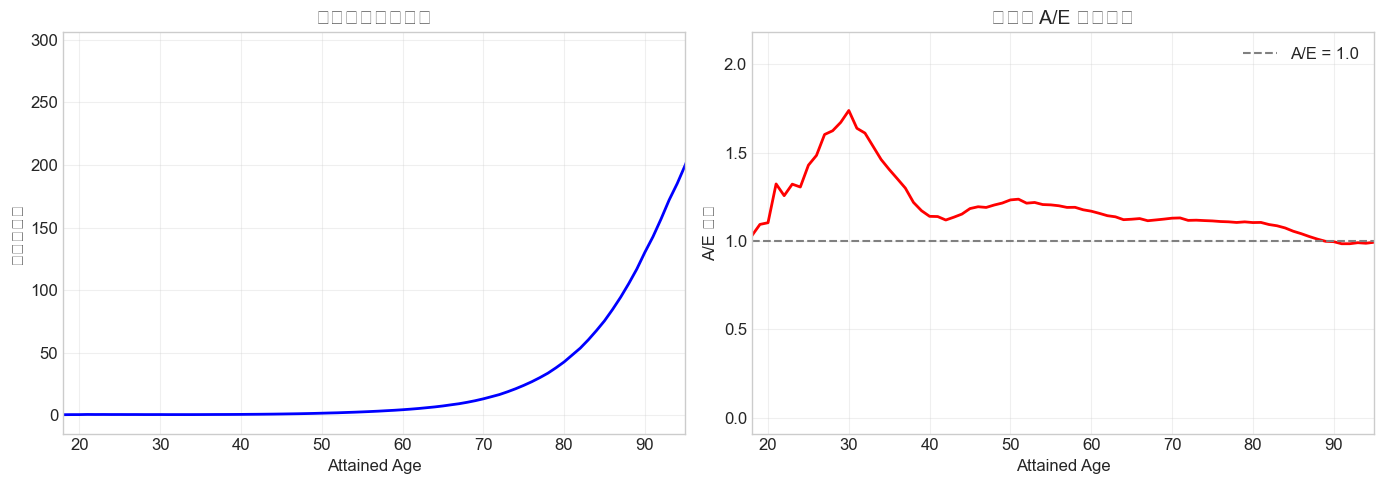

In [17]:
# Age Mortality Curve
age_df = pd.DataFrame([
    {
        'Attained_Age': age,
        'death_count': stats['death_count'],
        'policies_exposed': stats['policies_exposed'],
        'mortality_rate': stats['death_count'] / stats['policies_exposed'] * 1000 if stats['policies_exposed'] > 0 else 0,
        'ae_ratio': stats['death_count'] / stats['exp_death'] if stats['exp_death'] > 0 else 0
    }
    for age, stats in age_stats.items()
]).sort_values('Attained_Age')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mortality Rate Curve
axes[0].plot(age_df['Attained_Age'], age_df['mortality_rate'], 'b-', linewidth=2)
axes[0].set_xlabel('Attained Age')
axes[0].set_ylabel('Mortality Rate (per 1000)')
axes[0].set_title('Age Mortality Rate Curve')
axes[0].set_xlim(18, 95)
axes[0].grid(True, alpha=0.3)

# A/E Ratio Curve
axes[1].plot(age_df['Attained_Age'], age_df['ae_ratio'], 'r-', linewidth=2)
axes[1].axhline(y=1.0, color='gray', linestyle='--', label='A/E = 1.0')
axes[1].set_xlabel('Attained Age')
axes[1].set_ylabel('A/E Ratio')
axes[1].set_title('Age A/E Ratio Curve')
axes[1].set_xlim(18, 95)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

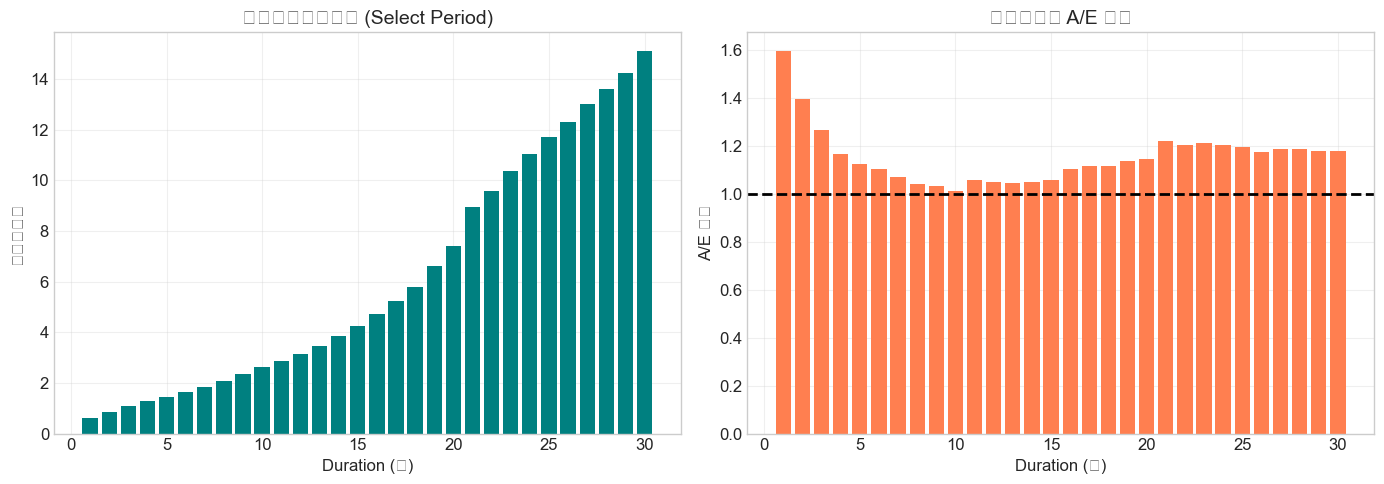

In [18]:
# Duration Mortality Curve (Select Period Analysis)
dur_df = pd.DataFrame([
    {
        'Duration': dur,
        'death_count': stats['death_count'],
        'policies_exposed': stats['policies_exposed'],
        'mortality_rate': stats['death_count'] / stats['policies_exposed'] * 1000 if stats['policies_exposed'] > 0 else 0,
        'ae_ratio': stats['death_count'] / stats['exp_death'] if stats['exp_death'] > 0 else 0
    }
    for dur, stats in dur_stats.items()
]).sort_values('Duration')

# Filter reasonable range
dur_df = dur_df[(dur_df['Duration'] >= 1) & (dur_df['Duration'] <= 30)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Duration Mortality Rate
axes[0].bar(dur_df['Duration'], dur_df['mortality_rate'], color='teal')
axes[0].set_xlabel('Duration (Year)')
axes[0].set_ylabel('Mortality Rate (per 1000)')
axes[0].set_title('Policy Year Mortality Rate (Select Period)')
axes[0].grid(True, alpha=0.3)

# Duration A/E Ratio
axes[1].bar(dur_df['Duration'], dur_df['ae_ratio'], color='coral')
axes[1].axhline(y=1.0, color='black', linestyle='--', linewidth=2)
axes[1].set_xlabel('Duration (Year)')
axes[1].set_ylabel('A/E Ratio')
axes[1].set_title('Policy Year A/E Ratio')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 8. Time Trend Analysis

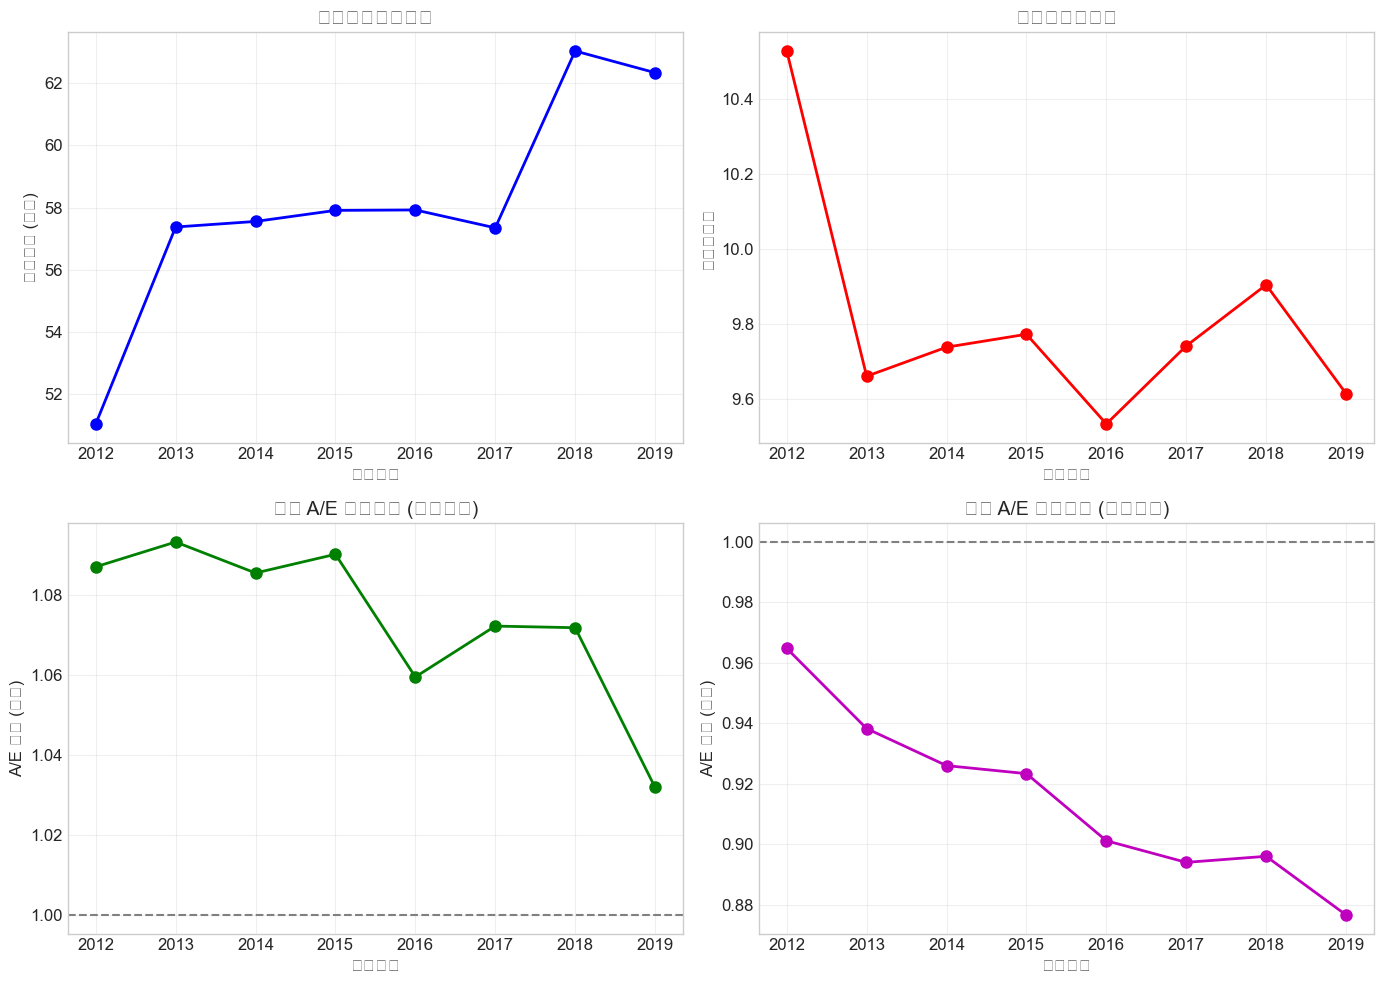


年度趨勢統計:


,Year,death_count,policies_exposed,mortality_rate,ae_ratio_cnt,ae_ratio_amt
0,2012,537286,5.103643e+07,10.527500,1.087091,0.964809
1,2013,554199,5.737303e+07,9.659574,1.093300,0.938282
2,2014,560393,5.755216e+07,9.737132,1.085542,0.926028
3,2015,565853,5.790785e+07,9.771611,1.090221,0.923372
4,2016,552127,5.792176e+07,9.532289,1.059533,0.901188
5,2017,558579,5.734615e+07,9.740480,1.072260,0.894028
6,2018,624284,6.303686e+07,9.903475,1.071857,0.896036
7,2019,599288,6.233901e+07,9.613371,1.031934,0.876641


In [19]:
# Observed Annual Trend
year_df = pd.DataFrame([
    {
        'Year': year,
        'death_count': stats['death_count'],
        'policies_exposed': stats['policies_exposed'],
        'mortality_rate': stats['death_count'] / stats['policies_exposed'] * 1000 if stats['policies_exposed'] > 0 else 0,
        'ae_ratio_cnt': stats['death_count'] / stats['exp_death'] if stats['exp_death'] > 0 else 0,
        'ae_ratio_amt': stats['death_amount'] / stats['exp_death_amt'] if stats['exp_death_amt'] > 0 else 0
    }
    for year, stats in year_stats.items()
]).sort_values('Year')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Policies ExposedTrend
axes[0, 0].plot(year_df['Year'], year_df['policies_exposed'] / 1e6, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Observation Years')
axes[0, 0].set_ylabel('Policies Exposed (Million)')
axes[0, 0].set_title('年度Policies ExposedTrend')
axes[0, 0].grid(True, alpha=0.3)

# 死亡率Trend
axes[0, 1].plot(year_df['Year'], year_df['mortality_rate'], 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Observation Years')
axes[0, 1].set_ylabel('Mortality Rate (per 1000)')
axes[0, 1].set_title('Annual Mortality Rate Trend')
axes[0, 1].grid(True, alpha=0.3)

# A/E Ratio Trend (Count)
axes[1, 0].plot(year_df['Year'], year_df['ae_ratio_cnt'], 'go-', linewidth=2, markersize=8)
axes[1, 0].axhline(y=1.0, color='gray', linestyle='--')
axes[1, 0].set_xlabel('Observation Years')
axes[1, 0].set_ylabel('A/E Ratio (Count)')
axes[1, 0].set_title('Annual A/E Ratio Trend (Count Basis)')
axes[1, 0].grid(True, alpha=0.3)

# A/E Ratio Trend (Amount)
axes[1, 1].plot(year_df['Year'], year_df['ae_ratio_amt'], 'mo-', linewidth=2, markersize=8)
axes[1, 1].axhline(y=1.0, color='gray', linestyle='--')
axes[1, 1].set_xlabel('Observation Years')
axes[1, 1].set_ylabel('A/E Ratio (Amount)')
axes[1, 1].set_title('Annual A/E Ratio Trend (Amount Basis)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\nAnnual Trend Statistics:')
year_df

---
## 9. Preferred Class Analysis

In [20]:
# Preferred Class Group Statistics
print('CalculatingPreferred Class Group Statistics...')

pfd_ind_stats = defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0, 'exp_death': 0})
pfd_class_stats = defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0, 'exp_death': 0})

for chunk in pd.read_csv(DATA_PATH, sep='\t', chunksize=CHUNK_SIZE):
    for pfd_ind, grp in chunk.groupby('Preferred_Indicator'):
        pfd_ind_stats[pfd_ind]['death_count'] += grp['Death_Count'].sum()
        pfd_ind_stats[pfd_ind]['policies_exposed'] += grp['Policies_Exposed'].sum()
        pfd_ind_stats[pfd_ind]['exp_death'] += grp['ExpDth_VBT2015_Cnt'].sum()
    
    for pfd_class, grp in chunk.groupby('Preferred_Class'):
        pfd_class_stats[pfd_class]['death_count'] += grp['Death_Count'].sum()
        pfd_class_stats[pfd_class]['policies_exposed'] += grp['Policies_Exposed'].sum()
        pfd_class_stats[pfd_class]['exp_death'] += grp['ExpDth_VBT2015_Cnt'].sum()

print('Preferred Class Grouped statistics calculation complete!')

計算優選體分組統計...
優選體分組統計完成!


In [21]:
# Preferred Indicator Analysis
pfd_ind_df = pd.DataFrame([
    {
        'Preferred_Indicator': pfd,
        'Death Count': stats['death_count'],
        'Policies Exposed': stats['policies_exposed'],
        'Mortality Rate (per 1000)': stats['death_count'] / stats['policies_exposed'] * 1000 if stats['policies_exposed'] > 0 else 0,
        'A/E Ratio': stats['death_count'] / stats['exp_death'] if stats['exp_death'] > 0 else 0
    }
    for pfd, stats in pfd_ind_stats.items()
])
print('\n=== Preferred Indicator (Preferred Indicator) Analysis ===')
pfd_ind_df


=== 優選體指標 (Preferred Indicator) 分析 ===


,Preferred_Indicator,死亡件數,暴險件數,千人死亡率,A/E比率
0,0,2834178,1.874166e+08,15.122344,1.089618
1,1,374050,1.484122e+08,2.520346,1.042247
2,0,1144804,6.711494e+07,17.057366,1.055992
3,1,180174,5.754400e+07,3.131065,0.997867
4,U,18803,4.025580e+06,4.670879,1.106308


In [22]:
# Preferred Class Analysis
pfd_class_df = pd.DataFrame([
    {
        'Preferred_Class': cls,
        'Death Count': stats['death_count'],
        'Policies Exposed': stats['policies_exposed'],
        'Mortality Rate (per 1000)': stats['death_count'] / stats['policies_exposed'] * 1000 if stats['policies_exposed'] > 0 else 0,
        'A/E Ratio': stats['death_count'] / stats['exp_death'] if stats['exp_death'] > 0 else 0
    }
    for cls, stats in pfd_class_stats.items()
])
print('\n=== Preferred Class Analysis ===')
pfd_class_df


=== 優選體等級 (Preferred Class) 分析 ===


,Preferred_Class,死亡件數,暴險件數,千人死亡率,A/E比率
0,1.0,108765,6.780302e+07,1.604132,0.809144
1,2.0,184152,4.843114e+07,3.802347,1.225876
2,3.0,65703,2.505474e+07,2.622378,1.080588
3,4.0,15430,7.123250e+06,2.166146,1.147697
4,1,47496,2.541678e+07,1.868687,0.774192
5,2,90819,1.873320e+07,4.848024,1.126872
6,3,33277,1.013007e+07,3.284973,1.064767
7,4,8582,3.263949e+06,2.629330,1.165530
8,U,18803,4.025580e+06,4.670879,1.106308


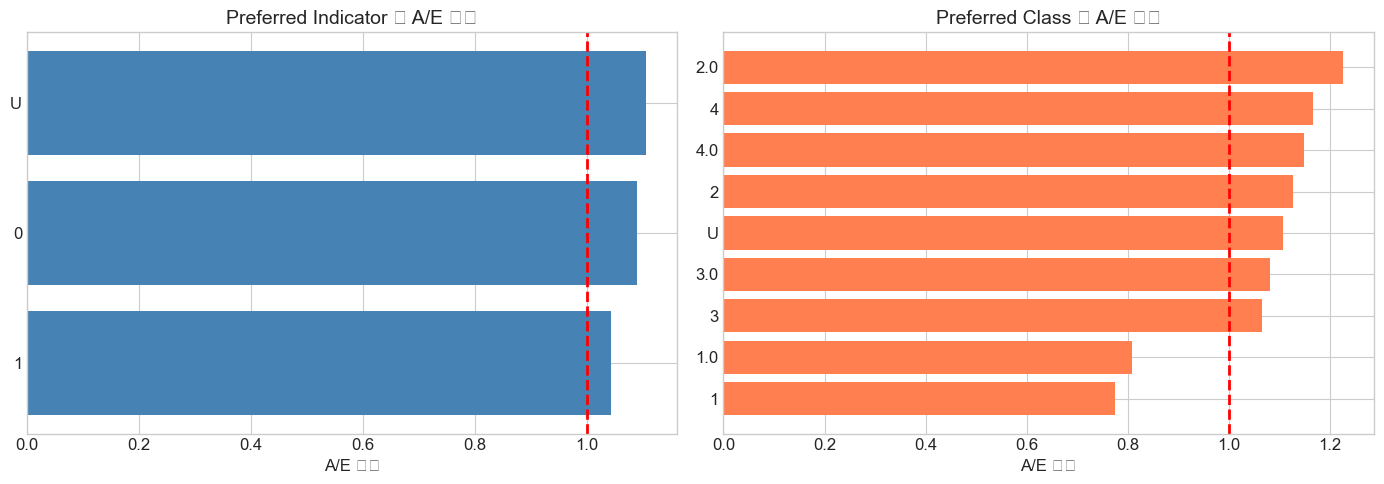

In [23]:
# Preferred Class Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Preferred Indicator
pfd_ind_df_plot = pfd_ind_df.sort_values('A/E Ratio')
bars1 = axes[0].barh(pfd_ind_df_plot['Preferred_Indicator'].astype(str), pfd_ind_df_plot['A/E Ratio'], color='steelblue')
axes[0].axvline(x=1.0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('A/E Ratio')
axes[0].set_title('A/E Ratio by Preferred Indicator')

# Preferred Class
pfd_class_df_plot = pfd_class_df.sort_values('A/E Ratio')
bars2 = axes[1].barh(pfd_class_df_plot['Preferred_Class'].astype(str), pfd_class_df_plot['A/E Ratio'], color='coral')
axes[1].axvline(x=1.0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('A/E Ratio')
axes[1].set_title('A/E Ratio by Preferred Class')

plt.tight_layout()
plt.show()

# EDA Analysis: WLT vs PLT Comparison

This notebook performs an Exploratory Data Analysis (EDA) comparing Within Level Term (WLT) and Post Level Term (PLT) policies using the ILEC 2012-2019 mortality dataset.

**Key Visualizations:**
1. A/E Ratio vs. Duration (by WLT / PLT)
2. Death Rate vs. Attained Age (WLT vs. PLT)
3. Exposure Count over Duration (Pre/Post PLT)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings

warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# File path
DATA_PATH = '../data/ILEC_2012_19 - 20240429.txt'
CHUNK_SIZE = 500000

## Data Processing

We process the data in chunks due to its large size. We aggregate data for three main metrics:
- A/E Ratio
- Death Rate
- Exposure

In [ ]:
# Data Aggregation Collectors

# 1. AE vs Duration (by WLT/PLT)
ae_duration = {'WLT': defaultdict(lambda: {'death_count': 0, 'exp_death': 0}),
               'PLT': defaultdict(lambda: {'death_count': 0, 'exp_death': 0})}

# 2. Death Rate vs Attained Age (by WLT/PLT)  
death_rate_age = {'WLT': defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0}),
                  'PLT': defaultdict(lambda: {'death_count': 0, 'policies_exposed': 0})}

# 3. Exposure count over duration (Pre/Post PLT)
exposure_duration = {'WLT': defaultdict(lambda: {'policies_exposed': 0, 'amount_exposed': 0}),
                     'PLT': defaultdict(lambda: {'policies_exposed': 0, 'amount_exposed': 0})}

print("Starting Chunk-based Processing...")
print("=" * 60)

chunk_num = 0
total_rows = 0
wlt_count = 0
plt_count = 0

for chunk in pd.read_csv(DATA_PATH, sep='\t', chunksize=CHUNK_SIZE):
    chunk_num += 1
    total_rows += len(chunk)
    
    # Process only records with WLT/PLT indicator
    for level_type in ['WLT', 'PLT']:
        subset = chunk[chunk['SOA_Post_Lvl_Ind'] == level_type]
        
        if level_type == 'WLT':
            wlt_count += len(subset)
        else:
            plt_count += len(subset)
        
        if len(subset) == 0:
            continue
        
        # 1. AE vs Duration - using groupby aggregation
        duration_grp = subset.groupby('Duration').agg({
            'Death_Count': 'sum',
            'ExpDth_VBT2015_Cnt': 'sum'
        }).reset_index()
        
        for _, row in duration_grp.iterrows():
            d = row['Duration']
            ae_duration[level_type][d]['death_count'] += row['Death_Count']
            ae_duration[level_type][d]['exp_death'] += row['ExpDth_VBT2015_Cnt']
        
        # 2. Death Rate vs Attained Age
        age_grp = subset.groupby('Attained_Age').agg({
            'Death_Count': 'sum',
            'Policies_Exposed': 'sum'
        }).reset_index()
        
        for _, row in age_grp.iterrows():
            age = row['Attained_Age']
            death_rate_age[level_type][age]['death_count'] += row['Death_Count']
            death_rate_age[level_type][age]['policies_exposed'] += row['Policies_Exposed']
        
        # 3. Exposure count over duration
        exp_grp = subset.groupby('Duration').agg({
            'Policies_Exposed': 'sum',
            'Amount_Exposed': 'sum'
        }).reset_index()
        
        for _, row in exp_grp.iterrows():
            d = row['Duration']
            exposure_duration[level_type][d]['policies_exposed'] += row['Policies_Exposed']
            exposure_duration[level_type][d]['amount_exposed'] += row['Amount_Exposed']
    
    if chunk_num % 10 == 0:
        print(f"  Processed {chunk_num} chunks ({total_rows:,} records)")

print(f"\nProcessing Complete!")
print(f"  Total records: {total_rows:,}")
print(f"  WLT records: {wlt_count:,}")
print(f"  PLT records: {plt_count:,}")
print("=" * 60)

## Data Preparation

In [ ]:
# 1. AE vs Duration
ae_data = []
for level_type in ['WLT', 'PLT']:
    for duration, stats in sorted(ae_duration[level_type].items()):
        if stats['exp_death'] > 0:
            ae = stats['death_count'] / stats['exp_death']
            ae_data.append({
                'Duration': duration, 
                'AE_Ratio': ae, 
                'Type': level_type,
                'Death_Count': stats['death_count'], 
                'Exp_Death': stats['exp_death']
            })
ae_df = pd.DataFrame(ae_data)

# 2. Death Rate vs Attained Age
dr_data = []
for level_type in ['WLT', 'PLT']:
    for age, stats in sorted(death_rate_age[level_type].items()):
        if stats['policies_exposed'] > 0:
            death_rate = stats['death_count'] / stats['policies_exposed'] * 1000  # per 1000
            dr_data.append({
                'Attained_Age': age, 
                'Death_Rate_per_1000': death_rate, 
                'Type': level_type,
                'Death_Count': stats['death_count'], 
                'Policies_Exposed': stats['policies_exposed']
            })
dr_df = pd.DataFrame(dr_data)

# 3. Exposure count over duration
exp_data = []
for level_type in ['WLT', 'PLT']:
    for duration, stats in sorted(exposure_duration[level_type].items()):
        exp_data.append({
            'Duration': duration, 
            'Policies_Exposed': stats['policies_exposed'],
            'Amount_Exposed': stats['amount_exposed'],
            'Type': level_type
        })
exp_df = pd.DataFrame(exp_data)

## Visualizations

In [ ]:
# Define colors
colors = {'WLT': '#2E86AB', 'PLT': '#E94F37'}

# Figure 1: AE vs Duration (WLT vs PLT)
fig1, ax1 = plt.subplots(figsize=(14, 6))

ae_wlt = ae_df[ae_df['Type'] == 'WLT']
ae_plt = ae_df[ae_df['Type'] == 'PLT']

# Show only duration 1-50 (reasonable range)
ae_wlt_f = ae_wlt[(ae_wlt['Duration'] >= 1) & (ae_wlt['Duration'] <= 50)]
ae_plt_f = ae_plt[(ae_plt['Duration'] >= 1) & (ae_plt['Duration'] <= 50)]

ax1.plot(ae_wlt_f['Duration'], ae_wlt_f['AE_Ratio'], 
         marker='o', markersize=5, label='WLT (Within Level Term)', 
         color=colors['WLT'], linewidth=2, alpha=0.9)
ax1.plot(ae_plt_f['Duration'], ae_plt_f['AE_Ratio'], 
         marker='s', markersize=5, label='PLT (Post Level Term)', 
         color=colors['PLT'], linewidth=2, alpha=0.9)
ax1.axhline(y=1.0, color='gray', linestyle='--', alpha=0.7, linewidth=1.5, label='A/E = 1.0 (Expected)')
ax1.fill_between(ae_wlt_f['Duration'], ae_wlt_f['AE_Ratio'], 1.0, alpha=0.1, color=colors['WLT'])
ax1.fill_between(ae_plt_f['Duration'], ae_plt_f['AE_Ratio'], 1.0, alpha=0.1, color=colors['PLT'])

ax1.set_xlabel('Duration (Policy Year)', fontsize=12)
ax1.set_ylabel('A/E Ratio (Actual Deaths / Expected Deaths)', fontsize=12)
ax1.set_title('A/E Ratio vs Policy Duration: WLT vs PLT Comparison', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlim(0, 51)
ax1.set_ylim(0, max(ae_df['AE_Ratio'].max() * 1.1, 2.0))
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Figure 2: Death Rate vs Attained Age (WLT vs PLT)
fig2, ax2 = plt.subplots(figsize=(14, 6))

dr_wlt = dr_df[dr_df['Type'] == 'WLT']
dr_plt = dr_df[dr_df['Type'] == 'PLT']

# Show only age 20-90 (reasonable range)
dr_wlt_f = dr_wlt[(dr_wlt['Attained_Age'] >= 20) & (dr_wlt['Attained_Age'] <= 90)]
dr_plt_f = dr_plt[(dr_plt['Attained_Age'] >= 20) & (dr_plt['Attained_Age'] <= 90)]

ax2.plot(dr_wlt_f['Attained_Age'], dr_wlt_f['Death_Rate_per_1000'], 
         marker='o', markersize=5, label='WLT (Within Level Term)', 
         color=colors['WLT'], linewidth=2, alpha=0.9)
ax2.plot(dr_plt_f['Attained_Age'], dr_plt_f['Death_Rate_per_1000'], 
         marker='s', markersize=5, label='PLT (Post Level Term)', 
         color=colors['PLT'], linewidth=2, alpha=0.9)

ax2.set_xlabel('Attained Age', fontsize=12)
ax2.set_ylabel('Death Rate (per 1,000 Policy-Years)', fontsize=12)
ax2.set_title('Mortality Rate vs Attained Age: WLT vs PLT Comparison', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2.set_xlim(18, 92)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Figure 3: Exposure Count over Duration (Pre/Post PLT)
fig3, (ax3a, ax3b) = plt.subplots(1, 2, figsize=(16, 6))

exp_wlt = exp_df[exp_df['Type'] == 'WLT']
exp_plt = exp_df[exp_df['Type'] == 'PLT']

# Show only duration 1-50
exp_wlt_f = exp_wlt[(exp_wlt['Duration'] >= 1) & (exp_wlt['Duration'] <= 50)]
exp_plt_f = exp_plt[(exp_plt['Duration'] >= 1) & (exp_plt['Duration'] <= 50)]

# Merge for plotting
merged_durations = sorted(set(exp_wlt_f['Duration'].tolist() + exp_plt_f['Duration'].tolist()))
width = 0.35

# 3a: Policies Exposed
wlt_policies = []
plt_policies = []
for d in merged_durations:
    wlt_val = exp_wlt_f[exp_wlt_f['Duration'] == d]['Policies_Exposed'].sum()
    plt_val = exp_plt_f[exp_plt_f['Duration'] == d]['Policies_Exposed'].sum()
    wlt_policies.append(wlt_val / 1e6)
    plt_policies.append(plt_val / 1e6)

x = np.arange(len(merged_durations))
ax3a.bar(x - width/2, wlt_policies, width, label='WLT (Within Level Term)', 
         color=colors['WLT'], alpha=0.8)
ax3a.bar(x + width/2, plt_policies, width, label='PLT (Post Level Term)', 
         color=colors['PLT'], alpha=0.8)

ax3a.set_xlabel('Duration (Policy Year)', fontsize=12)
ax3a.set_ylabel('Policies Exposed (Millions)', fontsize=12)
ax3a.set_title('Policy Exposure by Duration', fontsize=14, fontweight='bold')
ax3a.legend(loc='upper right', fontsize=9)
ax3a.set_xticks(x[::5])
ax3a.set_xticklabels([d for d in merged_durations[::5]])
ax3a.grid(True, alpha=0.3, axis='y')

# 3b: Amount Exposed
wlt_amounts = []
plt_amounts = []
for d in merged_durations:
    wlt_val = exp_wlt_f[exp_wlt_f['Duration'] == d]['Amount_Exposed'].sum()
    plt_val = exp_plt_f[exp_plt_f['Duration'] == d]['Amount_Exposed'].sum()
    wlt_amounts.append(wlt_val / 1e12)
    plt_amounts.append(plt_val / 1e12)

ax3b.bar(x - width/2, wlt_amounts, width, label='WLT (Within Level Term)', 
         color=colors['WLT'], alpha=0.8)
ax3b.bar(x + width/2, plt_amounts, width, label='PLT (Post Level Term)', 
         color=colors['PLT'], alpha=0.8)

ax3b.set_xlabel('Duration (Policy Year)', fontsize=12)
ax3b.set_ylabel('Amount Exposed (Trillions $)', fontsize=12)
ax3b.set_title('Amount Exposure by Duration', fontsize=14, fontweight='bold')
ax3b.legend(loc='upper right', fontsize=9)
ax3b.set_xticks(x[::5])
ax3b.set_xticklabels([d for d in merged_durations[::5]])
ax3b.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Statistical Summary

In [ ]:
print("=" * 60)
print("EDA Statistical Summary")
print("=" * 60)

print("\n[1. A/E Ratio Statistics]")
if len(ae_wlt_f) > 0:
    print(f"  WLT Average A/E: {ae_wlt_f['AE_Ratio'].mean():.4f}")
    print(f"  WLT A/E Range: {ae_wlt_f['AE_Ratio'].min():.4f} ~ {ae_wlt_f['AE_Ratio'].max():.4f}")
    print(f"  WLT Total Actual Deaths: {ae_wlt_f['Death_Count'].sum():,.0f}")
if len(ae_plt_f) > 0:
    print(f"  PLT Average A/E: {ae_plt_f['AE_Ratio'].mean():.4f}")
    print(f"  PLT A/E Range: {ae_plt_f['AE_Ratio'].min():.4f} ~ {ae_plt_f['AE_Ratio'].max():.4f}")
    print(f"  PLT Total Actual Deaths: {ae_plt_f['Death_Count'].sum():,.0f}")

print("\n[2. Death Rate Statistics (per 1,000 Policy-Years)]")
if len(dr_wlt_f) > 0:
    print(f"  WLT Average Death Rate: {dr_wlt_f['Death_Rate_per_1000'].mean():.4f}")
    print(f"  WLT Death Rate Range: {dr_wlt_f['Death_Rate_per_1000'].min():.4f} ~ {dr_wlt_f['Death_Rate_per_1000'].max():.4f}")
if len(dr_plt_f) > 0:
    print(f"  PLT Average Death Rate: {dr_plt_f['Death_Rate_per_1000'].mean():.4f}")
    print(f"  PLT Death Rate Range: {dr_plt_f['Death_Rate_per_1000'].min():.4f} ~ {dr_plt_f['Death_Rate_per_1000'].max():.4f}")

print("\n[3. Exposure Statistics]")
wlt_total_pol = exp_wlt['Policies_Exposed'].sum()
plt_total_pol = exp_plt['Policies_Exposed'].sum()
wlt_total_amt = exp_wlt['Amount_Exposed'].sum()
plt_total_amt = exp_plt['Amount_Exposed'].sum()

print(f"  WLT Total Policies Exposed: {wlt_total_pol:,.0f}")
print(f"  PLT Total Policies Exposed: {plt_total_pol:,.0f}")
print(f"  WLT Total Amount Exposed: ${wlt_total_amt:,.0f}")
print(f"  PLT Total Amount Exposed: ${plt_total_amt:,.0f}")
if wlt_total_pol + plt_total_pol > 0:
    wlt_pct = wlt_total_pol / (wlt_total_pol + plt_total_pol) * 100
    print(f"  WLT Proportion: {wlt_pct:.1f}%")
    print(f"  PLT Proportion: {100 - wlt_pct:.1f}%")

---
## 10. EDA Key Findings Summary

In [24]:
print('='*70)
print('                    ILEC 2012-2019 Dataset EDA Key Findings')
print('='*70)
print()
print('【Data Scale】')
print(f'  • Total Records: {total_rows:,}')
print(f'  • Columns: 30')
print(f'  • Observation Years: 2012-2019')
print()
print('【Overall Mortality Experience】')
print(f'  • Total Policies Exposed: {total_policies_exposed:,.0f}')
print(f'  • Total Death Count: {total_death_count:,.0f}')
print(f'  • Overall A/E Ratio (Count): {ae_ratio_count:.4f}')
print(f'  • Overall A/E Ratio (Amount): {ae_ratio_amount:.4f}')
print()
print('【Key Actuarial Insights】')
print('  1. Age Effect: Mortality increases exponentially with age, consistent with actuarial expectations')
print('  2. Sex Difference: Male mortality significantly higher than female')
print('  3. Smoking Effect: Smokers have significantly higher mortality rates')
print('  4. Select Period: Lower mortality in early policy years, showing selection effect')
print('  5. Preferred Effect: Preferred class mortality is lower than standard')
print()
print('【Model Interpretability Suggestions】')
print('  • Key Features: Attained_Age, Sex, Smoker_Status, Duration, Preferred_Class')
print('  • Note Interactions: Age x Smokers、Age x Sex')
print('  • Consider A/E ratio as target variable or weighting')
print('='*70)

                    ILEC 2012-2019 資料集 EDA 關鍵發現

【資料規模】
  • 總資料筆數: 45,501,036
  • 欄位數: 30
  • 觀察年度: 2012-2019

【整體死亡經驗】
  • 總暴險件數: 464,513,252
  • 總死亡件數: 4,552,009
  • 整體 A/E 比率 (件數): 1.0732
  • 整體 A/E 比率 (金額): 0.9105

【重要精算洞察】
  1. 年齡效應: 死亡率隨年齡增加呈指數成長，符合精算預期
  2. 性別差異: 男性死亡率顯著高於女性
  3. 吸菸影響: 吸菸者死亡率明顯較高
  4. Select Period: 前幾個保單年度死亡率較低，呈現選擇效應
  5. 優選體效果: 優選體死亡率低於非優選體

【模型可解釋性建議】
  • 關鍵特徵: Attained_Age, Sex, Smoker_Status, Duration, Preferred_Class
  • 注意交互作用: 年齡×吸菸、年齡×性別
  • 考慮 A/E ratio 作為目標變數或加權方式
